In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

In [2]:
df = pd.read_excel("date_python.xlsx",index_col="Numar Inregistrare")
print(df)

                               Tip unitate        Nume Unitate Tip categorie   
Numar Inregistrare                                                             
J12/1823/1991       PENSIUNE AGROTURISTICĂ           PĂSTRĂVUL   3 MARGARETE  \
J12/4339/1991       PENSIUNE AGROTURISTICĂ       CASA PETRU II       2 FLORI   
J12/4339/1991       PENSIUNE AGROTURISTICĂ   CASA PETRU STOLNA       2 FLORI   
J19/694/1992        PENSIUNE AGROTURISTICĂ                VARI   3 MARGARETE   
J33/765/1991        PENSIUNE AGROTURISTICĂ             LUCIANO       3 FLORI   
...                                    ...                 ...           ...   
J36/483/2006        PENSIUNE AGROTURISTICĂ             VASILIU       2 FLORI   
F38/394/2010        PENSIUNE AGROTURISTICĂ              ARNOTA       2 FLORI   
F38/709/2008        PENSIUNE AGROTURISTICĂ      CASA FILOXENIA       3 FLORI   
F38/532/2006        PENSIUNE AGROTURISTICĂ         STOICA ILIE       2 FLORI   
J/38/1264/1994      PENSIUNE AGROTURISTI

In [6]:
def median_profit(row):
    values = row[['Profit net 2021', 'Profit net 2020', 'Profit net 2019', 'Profit net 2018']].dropna()
    
    if len(values) <= 1:
        return np.nan
    else:
        return values.median()

# Create a new column with the median fiscal value
df['Profit_medie'] = df.apply(median_profit, axis=1)

In [4]:
def median_fiscal_value(row):
    values = row[['Cifra de afaceri neta 2021', 'Cifra de afaceri neta 2020', 'Cifra de afaceri neta 2019', 'Cifra de afaceri neta 2018']].dropna()
    
    if len(values) <= 1:
        return np.nan
    else:
        return values.median()

# Create a new column with the median fiscal value
df['CA_medie'] = df.apply(median_fiscal_value, axis=1)

## Corelatie intre altitudine si profit

In [6]:
column_names = ['Profit_medie', 'Altitudine']
new_df = pd.DataFrame(df[column_names])
print(new_df)

                    Profit_medie  Altitudine
Numar Inregistrare                          
J12/1823/1991            12.2140  460.932098
J12/4339/1991             8.9605  437.595581
J12/4339/1991             8.9605  437.595581
J19/694/1992            319.2555  759.586914
J33/765/1991            -19.7735  523.018066
...                          ...         ...
J36/483/2006             50.2685  891.215332
F38/394/2010             50.2685  891.215332
F38/709/2008             50.2685  891.215332
F38/532/2006             50.2685  557.843689
J/38/1264/1994           50.2685  660.893188

[454 rows x 2 columns]


In [7]:
new_df.to_excel('Corelatie intre altitudine si profit.xlsx')

In [8]:
column_names = ['CA_medie', 'Altitudine']
new_df = pd.DataFrame(df[column_names])
print(new_df)
new_df.to_excel('Corelatie intre altitudine si cifra de afaceri.xlsx')


                    CA_medie  Altitudine
Numar Inregistrare                      
J12/1823/1991        88.0490  460.932098
J12/4339/1991        27.7855  437.595581
J12/4339/1991        27.7855  437.595581
J19/694/1992          2.9935  759.586914
J33/765/1991        261.0955  523.018066
...                      ...         ...
J36/483/2006        315.0360  891.215332
F38/394/2010        315.0360  891.215332
F38/709/2008        315.0360  891.215332
F38/532/2006        315.0360  557.843689
J/38/1264/1994      315.0360  660.893188

[454 rows x 2 columns]


In [6]:
df['CA_medie'] = df[["Cifra de afaceri neta 2021", "Cifra de afaceri neta 2020", "Cifra de afaceri neta 2019", "Cifra de afaceri neta 2018"]].apply(np.median, axis=1)
# 

## Corelație intre precipitații, temperatura medie, diferențele de temperatura și profitul

In [7]:
column_names = ['Profit_medie', 'Temperatura medie']
new_df = pd.DataFrame(df[column_names])

In [8]:
new_df.to_excel("Corelatie intre temperatura medie si media de profit.xlsx")

In [10]:
df["Variatia Temperaturii"] = df["Temperatura maxima medie"] - df["Temperatura minima medie"]
print(df["Variatia Temperaturii"])
column_names = ['Variatia Temperaturii', 'Profit_medie']

new_df = pd.DataFrame(df[column_names])
new_df.to_excel("Corelatie intre variatia de temperatura si media de profit.xlsx")


Numar Inregistrare
J12/1823/1991     8.034474
J12/4339/1991     9.420789
J12/4339/1991     9.420789
J19/694/1992      8.822895
J33/765/1991      8.706316
                    ...   
J36/483/2006      7.481316
F38/394/2010      7.481316
F38/709/2008      7.481316
F38/532/2006      8.314211
J/38/1264/1994    8.212368
Name: Variatia Temperaturii, Length: 454, dtype: float64


In [11]:
correlation = df['Profit_medie'].corr(df['Variatia Temperaturii'])
print(correlation)

0.09089992052908877


In [10]:
# df.dropna(subset=['CA_medie'], inplace=True)


In [11]:
# judet_CA_avg_df = df.groupby("Judet")["CA_medie"].mean().reset_index()


In [12]:
# judet_CA_avg_df.to_excel('judet_CA_avg_df.xlsx')

In [17]:
# df['Cheltuieli_medie'] = df[["Cheltuieli totale 2021", "Cheltuieli totale 2020", "Cheltuieli totale 2019", "Cheltuieli totale 2018"]].apply(np.median, axis=1)


In [24]:
# judet_Cheltuieli_totale_avg_df = df.groupby("Judet")["Cheltuieli_medie"].mean().reset_index()


In [25]:
# judet_Cheltuieli_totale_avg_df.to_excel('judet_Cheltuieli_totale_avg_df.xlsx')


In [26]:
# judet_counts = df.groupby('Judet').size().reset_index(name='Count')

# Display the new DataFrame
# print(judet_counts)

              Judet  Count
0              Alba     15
1            Alba\n      2
2              Arad      3
3             Argeș     11
4             Bihor     11
5   Bistrița-Năsăud     18
6          Botoșani      2
7            Brașov     22
8            Brăila      1
9             Buzău     10
10             CLUJ      1
11          COVASNA      1
12    Caraș-Severin      3
13             Cluj     58
14        Constanța      4
15          Covasna      9
16             Dolj      5
17           Galați      2
18          Giurgiu      1
19             Gorj     18
20         Harghita     19
21        Hunedoara     22
22             Iași      3
23            Ilfov      5
24        Maramureș     57
25        Mehedinți      9
26            Mureș      3
27            Neamț     11
28              Olt      1
29          Prahova      6
30        Satu Mare      4
31            Sibiu     16
32          Suceava     40
33            Sălaj     13
34        Teleorman      1
35            Timiș      2
3

In [27]:
# judet_counts.to_excel('Repartizarea pe harta a pensiunilor agroturistice pe judete.xlsx')


In [30]:
# tip_localitate_count = df.groupby('Tip Localitate Componenta').size().reset_index(name='Total')


In [31]:
# tip_localitate_count

,Tip Localitate Componenta,Total
0,Sat,1
1,com.,1
2,localitate componentă,15
3,sat,393


In [ ]:
# tip_localitate_count.to_excel('Repartizarea pe harta a pensiunilor agroturistice pe judete.xlsx')


In [32]:
# df['Profit_medie'] = df[["Profit net 2021", "Profit net 2020", "Profit net 2019", "Profit net 2018"]].apply(np.median, axis=1)


In [33]:
# judet_Profit_avg_df = df.groupby("Judet")["Profit_medie"].mean().reset_index()


In [34]:
# judet_Profit_avg_df.to_excel('judet_Profit_avg_df.xlsx')


    Unnamed: 0            Judet    CA_medie  Pib_Capita_medie
0            0             Alba  210.625500             21052
1            2             Arad  630.643000             21607
2            3            Argeș  157.888167             19122
3            4            Bihor  122.075063             17108
4            5  Bistrița-Năsăud  199.998357             15822
5            6         Botoșani  252.457500             10426
6            7           Brașov  184.026167             25515
7            8           Brăila    7.934500             15084
8            9            Buzău   52.828667             14166
9           10    Caraș-Severin  209.753000             16099
10          11             Cluj  109.434250             26694
11          12        Constanța   81.134750             26694
12          13          Covasna   45.304500             14748
13          14             Dolj  177.051333             16103
14          15           Galați   19.771000             14473
15      

In [54]:
df['CA_medie'] = df[["Cifra de afaceri neta 2021", "Cifra de afaceri neta 2020", "Cifra de afaceri neta 2019", "Cifra de afaceri neta 2018"]].apply(np.median, axis=1)


correlation = df['Altitudine'].corr(df['Profit_medie'])
print(correlation)

-0.08432859731149993


In [55]:
df = df[df['Altitudine'] >= 0]


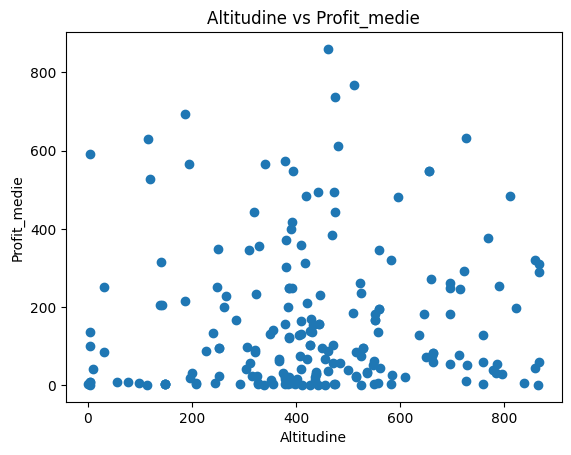

In [62]:
plt.scatter(df['Altitudine'], df['CA_medie'])

# Set x and y axis labels
plt.xlabel('Altitudine')
plt.ylabel('Profit_medie')

# Set the title of the graph
plt.title('Altitudine vs Profit_medie')
plt.savefig("Grafic de dispersie între Altitudine și Cifra de Afacere.png")
plt.show()

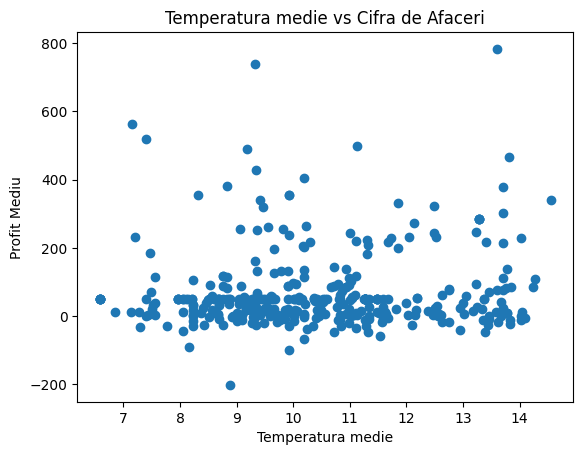

In [9]:
plt.scatter(df['Temperatura medie'], df['Profit_medie'])

# Set x and y axis labels
plt.xlabel('Temperatura medie')
plt.ylabel('Profit Mediu')

# Set the title of the graph
plt.title('Temperatura medie vs Cifra de Afaceri')
plt.savefig("Grafic de dispersie între Temperatura medie și Profit mediu.png")
plt.show()

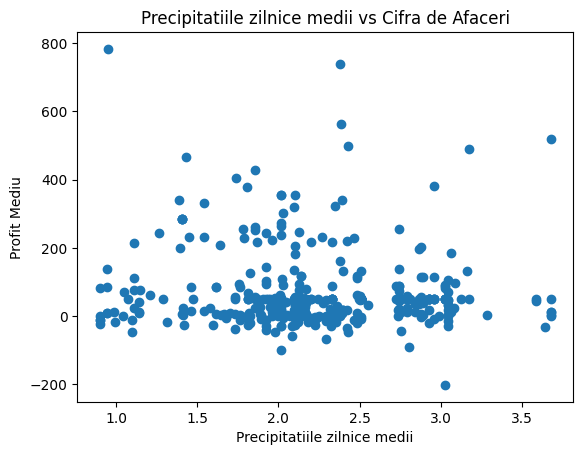

In [8]:
plt.scatter(df['Precipitatiile zilnice medii'], df['Profit_medie'])

# Set x and y axis labels
plt.xlabel('Precipitatiile zilnice medii')
plt.ylabel('Profit Mediu')

# Set the title of the graph
plt.title('Precipitatiile zilnice medii vs Cifra de Afaceri')
plt.savefig("Grafic de dispersie între Precipitatiile zilnice medii și Profit mediu.png")
plt.show()

In [11]:

correlation = df['Temperatura medie'].corr(df['Profit_medie'])
print(correlation)

0.10070901595182731


In [58]:
plt.savefig("Grafic de dispersie între Altitudine și Cifra de Afacere.png")

<Figure size 640x480 with 0 Axes>